In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
# Define the file path
file_path = r"C:\Users\ogoya\OneDrive\Documents\Dissertation General\Codes in progress\Datafordissertation.csv"

# Load the data
df = pd.read_csv(file_path)

# Display the first few rows of the data
print(df.head())

                     Timestamp What is your current level of education?    \
0  2024/03/12 5:16:02 PM GMT+1                            Master's Degree   
1  2024/03/12 5:25:22 PM GMT+1                                     Others   
2  2024/03/12 5:34:38 PM GMT+1                            Master's Degree   
3  2024/03/12 5:50:17 PM GMT+1                            Master's Degree   
4  2024/03/12 6:02:28 PM GMT+1                            Master's Degree   

  Have you taken any online courses or used virtual learning environments (VLEs) before?    \
0                                                Yes                                         
1                                                Yes                                         
2                                                Yes                                         
3                                                Yes                                         
4                                                Yes               

In [3]:
# Define column mapping dictionary
column_mapping = {
    "Timestamp": "Timestamp",
    "What is your current level of education?  ": "Education_Level",
    "Have you taken any online courses or used virtual learning environments (VLEs) before?  ": "Course_Experience",
    "If yes, which VLEs or online platforms have you used? (For example Alison, Udemy, Google, Moodle, Blackboard)": "Platforms_Used",
    "Rate your overall experience with the VLEs/online platforms you have used.  ": "Platform_Experience",
    "Which of the following learning styles best describe your preferences? Select all that apply. ": "Style_Preferences",
    "Did the VLEs/online platforms adapt or personalize the learning content based on your needs or preferences? ": "Content_Personalization",
    "If yes, how well did the personalization work for you?  ": "Personalization_Effectiveness",
    "What specific features or aspects of the VLEs/online platforms did you find most helpful or engaging?  (Select all that apply)": "Engaging_Features",
    "What aspects of the VLEs/online platforms could be improved to better cater to your learning needs?  (Select all that apply) ": "Improvement_Areas",
    "Did you face any accessibility barriers or challenges while using the VLEs/online platforms?  ": "Accessibility_Issues",
    "How well did the VLEs/online platforms accommodate your learning style, pace, or preferences? ": "Style_Accommodation",
    "Did the VLEs/online platforms provide sufficient support or resources for learners with diverse needs?  ": "Diverse_Support",
    "What additional features or support would you like to see in VLEs/online platforms to make them more inclusive and accessible? ": "Inclusive_Features",
    "Are you aware of machine learning or artificial intelligence being used in the VLEs/online platforms you have used?  ": "AI_Usage",
    "If yes, please select the machine learning or artificial intelligence techniques you have noticed being used in the VLEs/online platforms you've used (select all that apply):  ": "Noticed_Techniques",
    "What are your biggest challenges or areas for improvement when it comes to online learning? (Select all that apply.) ": "Learning_Challenges",
    "What features or functionalities would you find most helpful in a future online training program that utilizes machine learning for personalization and inclusivity? (Select all that apply) ": "ML_Training_Features",
    "How comfortable would you be with machine learning algorithms adapting and personalizing your online learning experience?  ": "ML_Comfort",
    "What potential benefits do you have regarding the use of machine learning in online learning environments? ": "ML_Benefits",
    "What potential concerns do you have regarding the use of machine learning in online learning environments? ": "ML_Concerns",
    "Please describe your ideal online learning experience and how technology could enhance it. ": "Learning_Ideal",
    "If you could change or improve one aspect of existing VLEs/online platforms, what would it be? ": "Platform_Improvement",
    "Google": "Google",
    "Coursera": "Coursera",
    "Udemy": "Udemy",
    "Moodle": "Moodle",
    "Alison": "Alison",
    "Skillshare": "Skillshare",
    "Nico's Weg": "Nico's Weg",
    "Brightspace": "Brightspace",
    "Blackboard": "Blackboard",
    "Sakai": "Sakai",
    "Zoom": "Zoom",
    "Pebble": "Pebble",
    "Odin Project": "Odin Project",
    "Futurelearn": "Futurelearn",
    "Refinitiv": "Refinitiv",
    "Microsoft Teams": "Microsoft Teams",
    "Data Camp": "Data Camp",
    "Odoo": "Odoo",
    "USAID": "USAID",
    "IHRDC": "IHRDC",
    "LinkedIn Learning": "LinkedIn Learning",
    "Webex": "Webex",
    "Workday": "Workday",
    "SheCodes": "SheCodes",
    "learnpro": "learnpro",
    "Canvas": "Canvas",
    "Pearson": "Pearson",
    "Udacity": "Udacity",
    "E-Conell University": "E-Conell University",
    "Others": "Others",
    "Uplearn": "Uplearn",
    "Schoology": "Schoology",
    "Khan Academy": "Khan Academy",
    "Open University": "Open University",
    "Code Academy": "Code Academy",
    "Reed Courses": "Reed Courses",
    "Discord": "Discord",
    "Power School": "Power School",
    "Edstem": "Edstem"
}

# Rename columns in the dataframe using the mapping dictionary
df = df.rename(columns=column_mapping)


In [4]:
# List of columns to replace "Yes" and "No" with 1 and 0
columns_to_replace = [
    'Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg", 'Brightspace', 
    'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project', 'Futurelearn', 'Refinitiv', 
    'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID', 'IHRDC', 'LinkedIn Learning', 'Webex', 
    'Workday', 'SheCodes', 'learnpro', 'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 
    'Others', 'Uplearn', 'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 
    'Reed Courses', 'Discord', 'Power School', 'Edstem'
]

# Replace "Yes" with 1 and "No" with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [5]:
# Create new columns for each preference and set to False initially
preferences = ['Visual', 'Auditory', 'Documentation', 'Kinesthetic', 'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic']
for preference in preferences:
    df[preference] = False

# Iterate over the rows and update the corresponding preference columns
for index, row in df.iterrows():
    # Split the string by commas to get individual preferences
    entries = row['Style_Preferences'].replace(' ', '').split(',')
    for entry in entries:
        if entry in preferences:
            # Set corresponding preference column to True for that row
            df.at[index, entry] = True

In [6]:
df.head()

,Timestamp,Education_Level,Course_Experience,Platforms_Used,Platform_Experience,Style_Preferences,Did the VLEs/online platforms adapt or personalize the learning content based on your needs or preferences?,"If yes, how well did the personalization work for you?",Engaging_Features,What aspects of the VLEs/online platforms could be improved to better cater to your learning needs? (Select all that apply),...,Visual,Auditory,Documentation,Kinesthetic,Logical,Social,Solitary,Verbal,Musical,Naturalistic
0,2024/03/12 5:16:02 PM GMT+1,Master's Degree,Yes,Udemy,4.0,Verbal,Yes,4.0,Communication Tools,Improved user interface,...,False,False,False,False,False,False,False,True,False,False
1,2024/03/12 5:25:22 PM GMT+1,Others,Yes,Google,4.0,Auditory,No,NaN,Multimedia Content Access,More learning paths,...,False,True,False,False,False,False,False,False,False,False
2,2024/03/12 5:34:38 PM GMT+1,Master's Degree,Yes,"Cousera, Google",4.0,Visual,Yes,4.0,Interactive Assessments,Learning styles customisation,...,True,False,False,False,False,False,False,False,False,False
3,2024/03/12 5:50:17 PM GMT+1,Master's Degree,Yes,Alison,4.0,Auditory,Yes,4.0,Multimedia Content Access,Virtual Reality Integration,...,False,True,False,False,False,False,False,False,False,False
4,2024/03/12 6:02:28 PM GMT+1,Master's Degree,Yes,Udemy,4.0,"Visual, Auditory, Logical, Social, Naturalistic",NaN,NaN,Multimedia Content Access,"More learning paths,Practical application oppo...",...,True,True,False,False,True,True,False,False,False,True


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Visual', 'Auditory', 'Documentation', 'Kinesthetic', 
                     'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic']

# Encode each column and update the dataframe
for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])


In [8]:
df.head()

,Timestamp,Education_Level,Course_Experience,Platforms_Used,Platform_Experience,Style_Preferences,Did the VLEs/online platforms adapt or personalize the learning content based on your needs or preferences?,"If yes, how well did the personalization work for you?",Engaging_Features,What aspects of the VLEs/online platforms could be improved to better cater to your learning needs? (Select all that apply),...,Visual,Auditory,Documentation,Kinesthetic,Logical,Social,Solitary,Verbal,Musical,Naturalistic
0,2024/03/12 5:16:02 PM GMT+1,Master's Degree,Yes,Udemy,4.0,Verbal,Yes,4.0,Communication Tools,Improved user interface,...,0,0,0,0,0,0,0,1,0,0
1,2024/03/12 5:25:22 PM GMT+1,Others,Yes,Google,4.0,Auditory,No,NaN,Multimedia Content Access,More learning paths,...,0,1,0,0,0,0,0,0,0,0
2,2024/03/12 5:34:38 PM GMT+1,Master's Degree,Yes,"Cousera, Google",4.0,Visual,Yes,4.0,Interactive Assessments,Learning styles customisation,...,1,0,0,0,0,0,0,0,0,0
3,2024/03/12 5:50:17 PM GMT+1,Master's Degree,Yes,Alison,4.0,Auditory,Yes,4.0,Multimedia Content Access,Virtual Reality Integration,...,0,1,0,0,0,0,0,0,0,0
4,2024/03/12 6:02:28 PM GMT+1,Master's Degree,Yes,Udemy,4.0,"Visual, Auditory, Logical, Social, Naturalistic",NaN,NaN,Multimedia Content Access,"More learning paths,Practical application oppo...",...,1,1,0,0,1,1,0,0,0,1


# Data Exploration and Visualization 

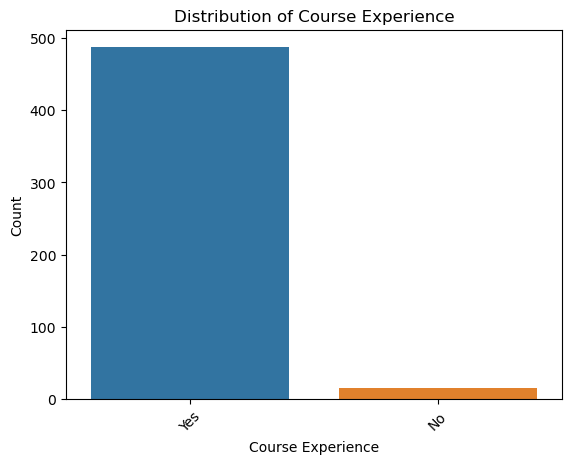

In [9]:
# Create a countplot to visualize the distribution of Course_Experience
sns.countplot(data=df, x='Course_Experience')
plt.xlabel('Course Experience')
plt.ylabel('Count')
plt.title('Distribution of Course Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

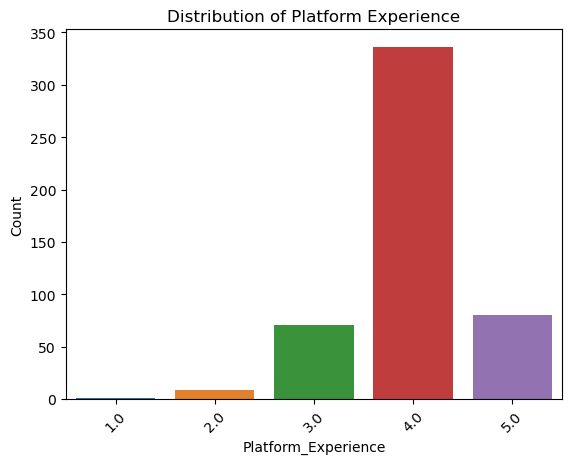

In [10]:
# Create a countplot to visualize the distribution of Course_Experience
sns.countplot(data=df, x='Platform_Experience')
plt.xlabel('Platform_Experience')
plt.ylabel('Count')
plt.title('Distribution of Platform Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

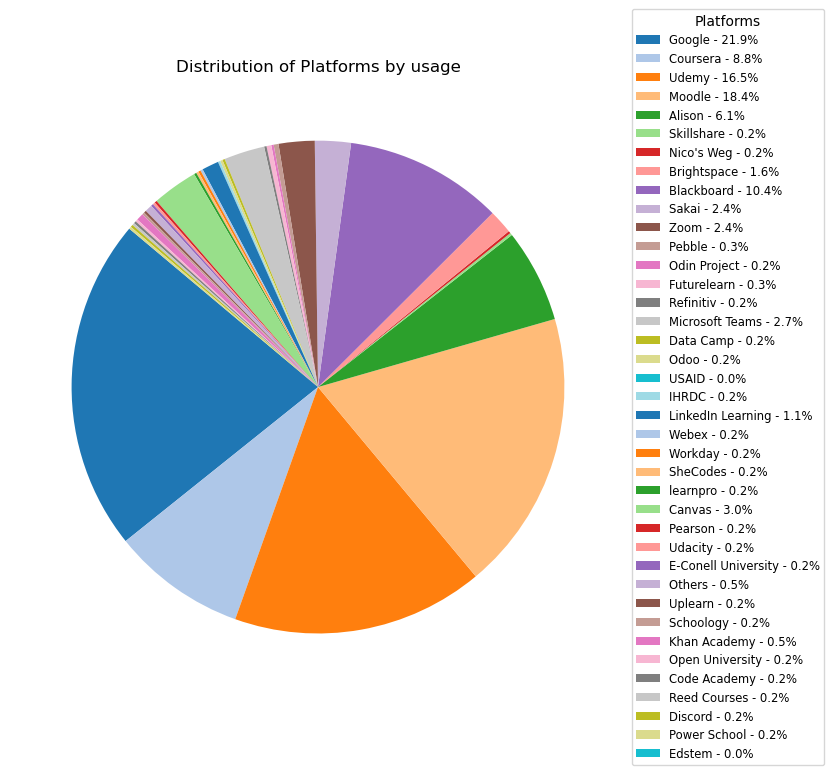

In [11]:
# List of columns to analyze
columns_to_analyze = ['Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg", 'Brightspace', 
                      'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project', 'Futurelearn', 'Refinitiv', 
                      'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID', 'IHRDC', 'LinkedIn Learning', 'Webex', 
                      'Workday', 'SheCodes', 'learnpro', 'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 
                      'Others', 'Uplearn', 'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 
                      'Reed Courses', 'Discord', 'Power School', 'Edstem']

# Count the number of '1' values in each column
counts = df[columns_to_analyze].apply(lambda x: (x == 1).sum())

# Create a pie chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(counts, labels=None, startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Platforms by usage')

# Calculate percentages
percentages = 100. * counts / counts.sum()
labels = [f'{name} - {percentage:.1f}%' for name, percentage in zip(counts.index, percentages)]

# Create legend
plt.legend(wedges, labels, title="Platforms", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')

# Show the plot
plt.show()

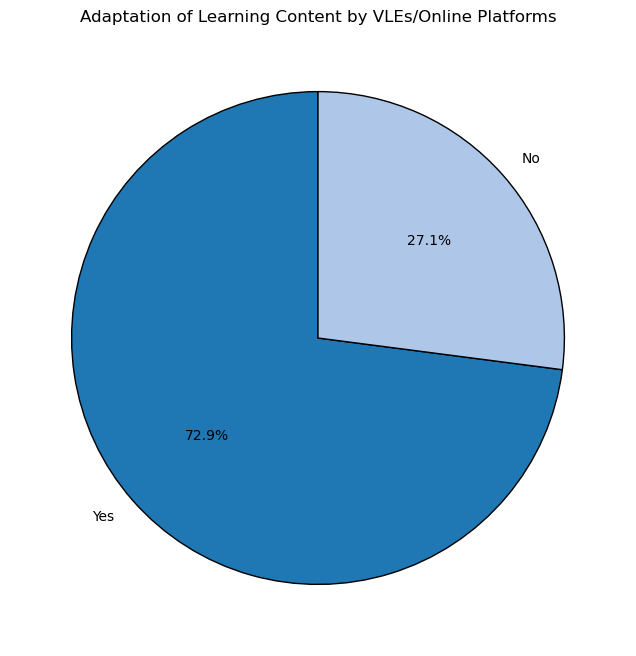

In [12]:
# Personalization Adaptation
plt.figure(figsize=(8, 8))
df['Did the VLEs/online platforms adapt or personalize the learning content based on your needs or preferences?'].value_counts().plot.pie(autopct='%1.1f%%', colors=plt.cm.tab20.colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Adaptation of Learning Content by VLEs/Online Platforms')
plt.ylabel('')
plt.show()

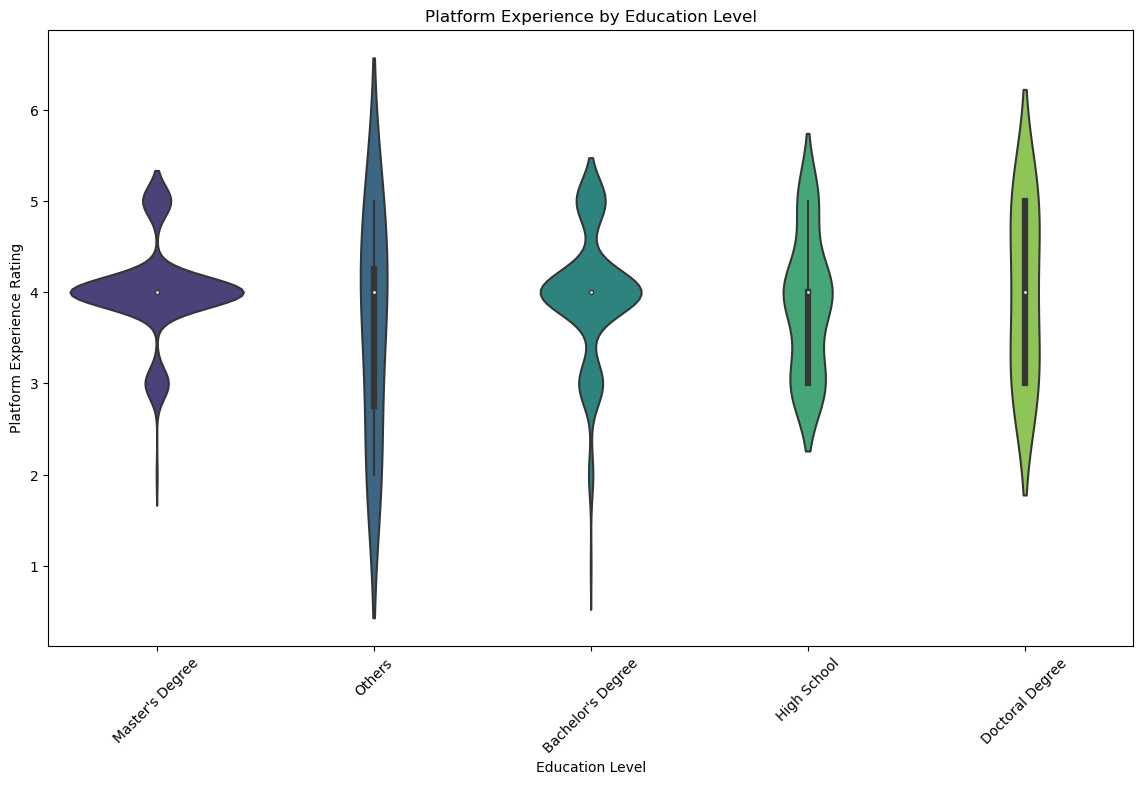

In [13]:
# Violin Plot of Platform Experience by Education Level
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Education_Level', y='Platform_Experience', palette='viridis')
plt.title('Platform Experience by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Platform Experience Rating')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

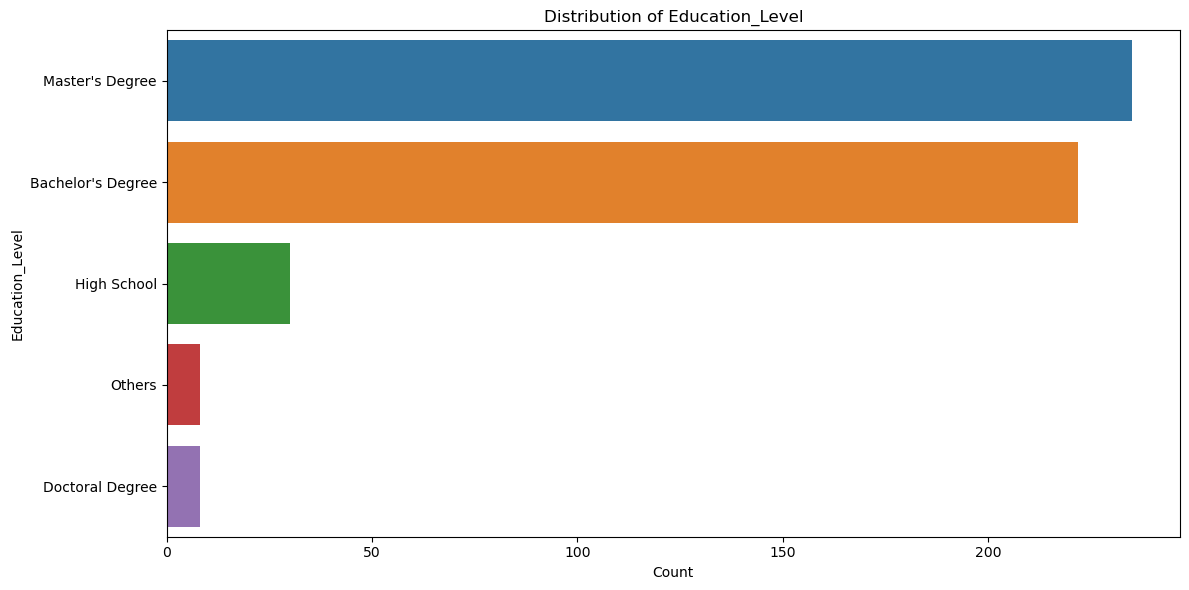

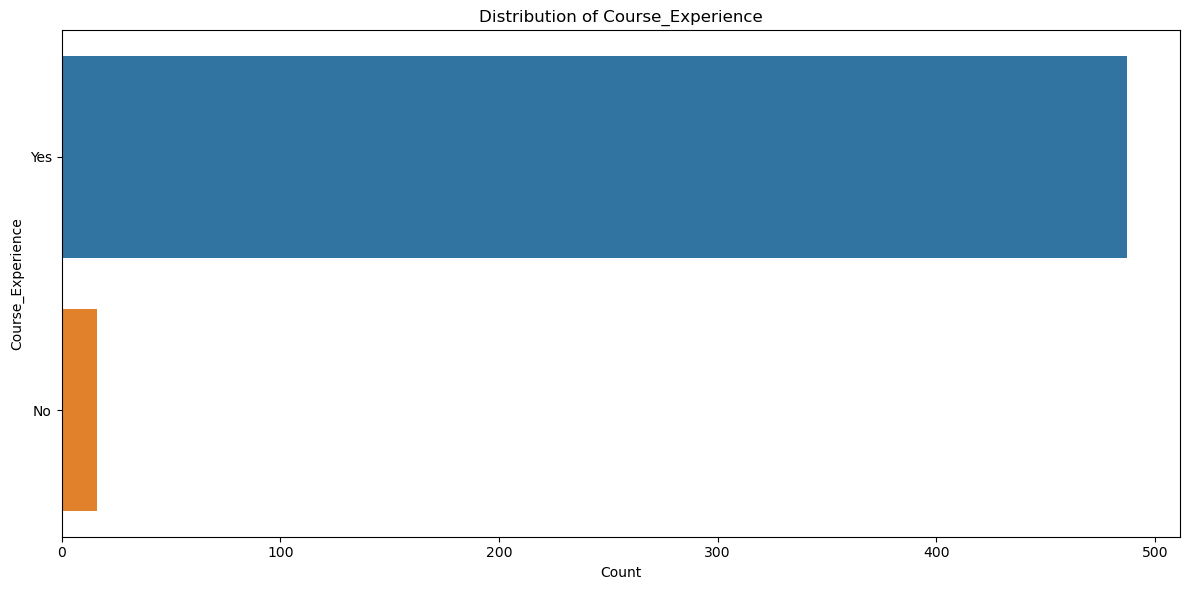

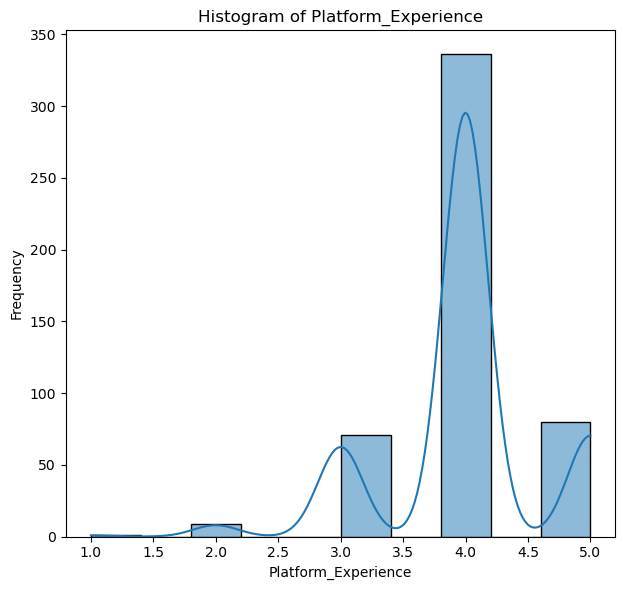

In [14]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


columns_to_visualize = [
    'Education_Level',
    'Course_Experience',
    'Platform_Experience',
    
]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through columns and create plots
for column in columns_to_visualize:
    plt.figure(figsize=(12, 6))
    
    # Check the data type to decide the plot type
    if df[column].dtype == 'object':
        # Categorical columns - bar plot
        sns.countplot(y=column, data=df, order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
    else:
        # Numerical columns - histogram 
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



# Machine Learning

In [15]:
# List of columns to be included in the new DataFrame df2
columns_to_include = [
    'Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', 'Nico\'s Weg', 'Brightspace',
    'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project', 'Futurelearn', 'Refinitiv',
    'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID', 'IHRDC', 'LinkedIn Learning', 'Webex',
    'Workday', 'SheCodes', 'learnpro', 'Canvas', 'Pearson', 'Udacity', 'E-Conell University',
    'Others', 'Uplearn', 'Schoology', 'Khan Academy', 'Open University', 'Code Academy',
    'Reed Courses', 'Discord', 'Power School', 'Edstem',
    'Visual', 'Auditory', 'Documentation', 'Kinesthetic', 'Logical', 'Social', 'Solitary',
    'Verbal', 'Musical', 'Naturalistic'
]

# Create the new DataFrame df2 with only the specified columns
df1 = df[columns_to_include]

                       Google  Coursera     Udemy    Moodle    Alison  \
Google               1.000000 -0.091519 -0.153319 -0.287604 -0.079415   
Coursera            -0.091519  1.000000  0.098135 -0.090147 -0.008081   
Udemy               -0.153319  0.098135  1.000000 -0.166999  0.088874   
Moodle              -0.287604 -0.090147 -0.166999  1.000000 -0.071639   
Alison              -0.079415 -0.008081  0.088874 -0.071639  1.000000   
Skillshare          -0.027581  0.126098 -0.022925 -0.024572  0.153948   
Nico's Weg          -0.027581  0.126098 -0.022925 -0.024572  0.153948   
Brightspace         -0.024314 -0.005131 -0.003065 -0.078411 -0.041290   
Blackboard          -0.082145 -0.081393 -0.098192 -0.074589 -0.002583   
Sakai               -0.108341 -0.024896 -0.032533 -0.041195 -0.007125   
Zoom                 0.048481 -0.062055 -0.090051 -0.096524 -0.050829   
Pebble              -0.039044  0.078072 -0.032453  0.039988 -0.018318   
Odin Project         0.072226  0.126098  0.086895 -

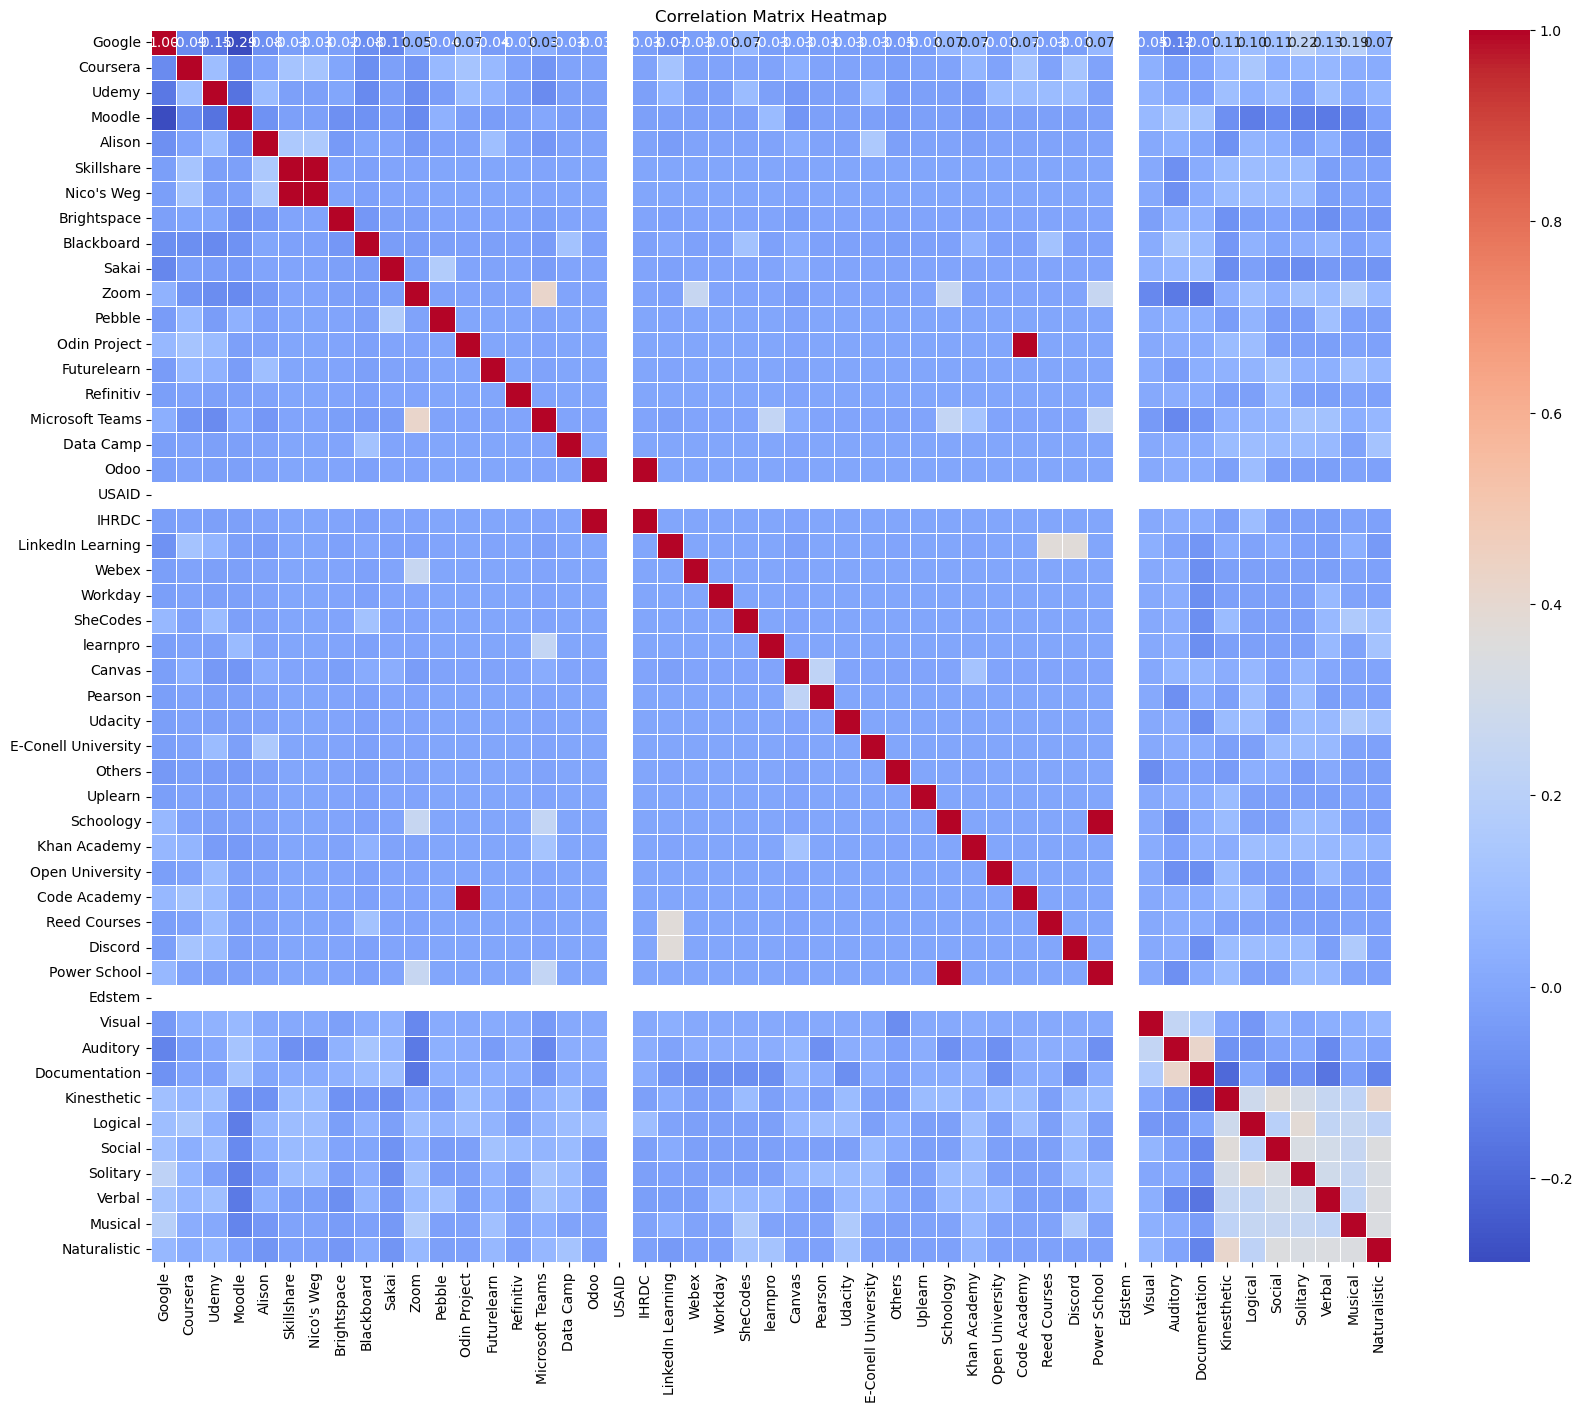

In [16]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Unsupervised Machine learning

In [17]:
import subprocess

subprocess.run(["python", "-W", "ignore::DeprecationWarning", "your_script.py"])

CompletedProcess(args=['python', '-W', 'ignore::DeprecationWarning', 'your_script.py'], returncode=2)

# K-Means Clustering

C:\Users\ogoya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ogoya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ogoya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ogoya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

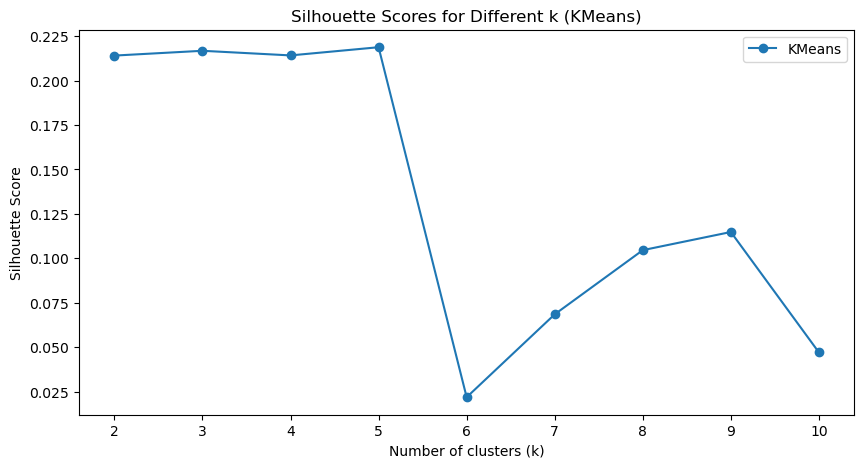

Optimal number of clusters for KMeans: 5


C:\Users\ogoya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ogoya\AppData\Local\Temp\ipykernel_26560\1852774606.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KMeans_Cluster'] = kmeans_labels


KMeans Silhouette Score: 0.2187218079848118

KMeans Cluster Centers:
     Google  Coursera     Udemy    Moodle    Alison    Skillshare  \
0  0.228643  0.110553  0.201005  0.261307  0.087940  1.734723e-18   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
2  0.000000  1.000000  0.000000  0.000000  1.000000  1.000000e+00   
3  0.460784  0.107843  0.245098  0.127451  0.029412 -1.734723e-18   
4  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00   

     Nico's Weg   Brightspace  Blackboard         Sakai  ...    Visual  \
0  1.734723e-18  2.512563e-02    0.135678  3.768844e-02  ...  0.942211   
1  0.000000e+00  3.469447e-18    0.000000 -3.469447e-18  ...  1.000000   
2  1.000000e+00  3.469447e-18    0.000000 -3.469447e-18  ...  1.000000   
3 -1.734723e-18  3.469447e-18    0.117647  3.469447e-18  ...  0.931373   
4  0.000000e+00  3.469447e-18    0.000000 -3.469447e-18  ...  1.000000   

   Auditory  Documentation  Kinesthetic  Logical        Social  Solitar

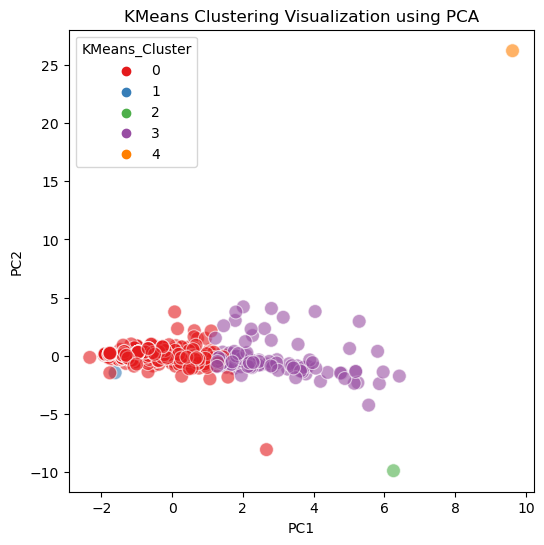

In [19]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# List of columns for clustering
columns_for_clustering = [
    'Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg",
    'Brightspace', 'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project',
    'Futurelearn', 'Refinitiv', 'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID',
    'IHRDC', 'LinkedIn Learning', 'Webex', 'Workday', 'SheCodes', 'learnpro',
    'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 'Others', 'Uplearn',
    'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 'Reed Courses',
    'Discord', 'Power School', 'Edstem', 'Visual', 'Auditory', 'Documentation',
    'Kinesthetic', 'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic'
]

# Prepare the data for clustering
X = df1[columns_for_clustering]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette scores
max_clusters = 10
silhouette_scores_kmeans = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans_labels))

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores_kmeans, marker='o', label='KMeans')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k (KMeans)')
plt.legend()
plt.show()

# Choose the optimal number of clusters based on the silhouette scores
optimal_clusters_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
print(f"Optimal number of clusters for KMeans: {optimal_clusters_kmeans}")

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df1['KMeans_Cluster'] = kmeans_labels

# Print silhouette score
print(f"KMeans Silhouette Score: {silhouette_score(X_scaled, kmeans_labels)}")

# Print cluster centers for KMeans
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)
kmeans_centers_df = pd.DataFrame(kmeans_centers, columns=X.columns)
print("\nKMeans Cluster Centers:")
print(kmeans_centers_df)

# Visualize the clustered data using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set1', s=100, alpha=0.6, edgecolor='w')
plt.title('KMeans Clustering Visualization using PCA')
plt.show()


# Agglomerative Clustering

Available columns: ['Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg", 'Brightspace', 'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project', 'Futurelearn', 'Refinitiv', 'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID', 'IHRDC', 'LinkedIn Learning', 'Webex', 'Workday', 'SheCodes', 'learnpro', 'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 'Others', 'Uplearn', 'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 'Reed Courses', 'Discord', 'Power School', 'Edstem', 'Visual', 'Auditory', 'Documentation', 'Kinesthetic', 'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic', 'KMeans_Cluster']


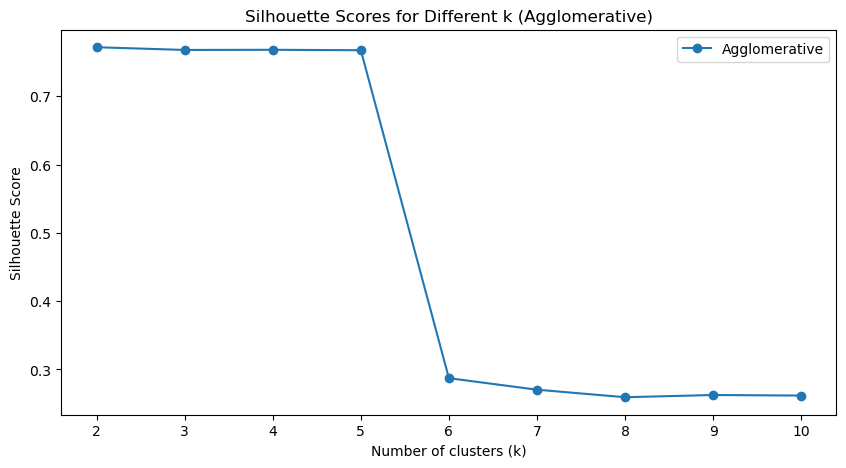

Optimal number of clusters for Agglomerative Clustering: 2
Agglomerative Clustering Silhouette Score: 0.7717335360217423


C:\Users\ogoya\AppData\Local\Temp\ipykernel_26560\482052982.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Agg_Cluster'] = agg_labels


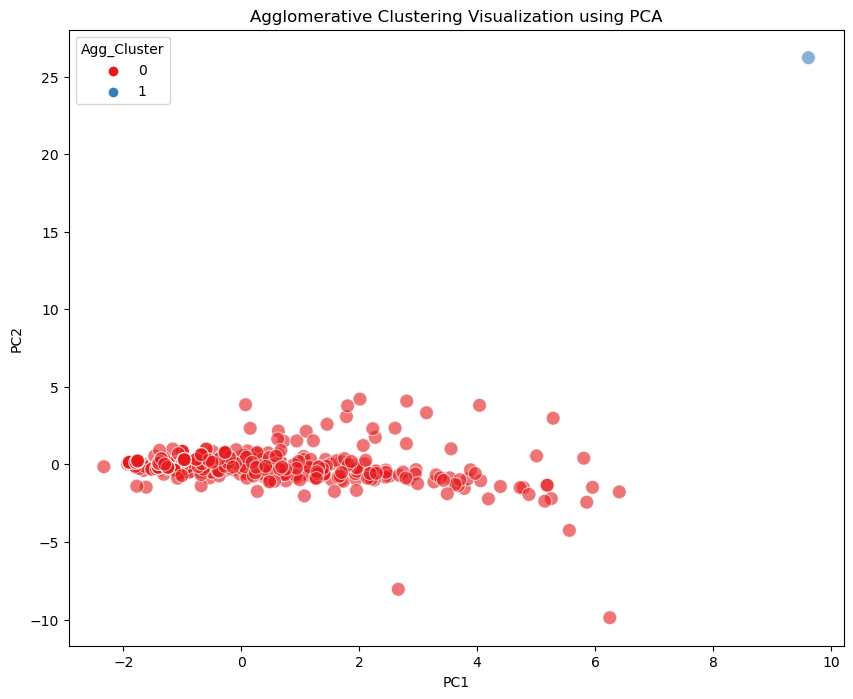

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



print("Available columns:", df1.columns.tolist())

# Use only the columns that are actually present in your DataFrame
available_columns = [col for col in df1.columns if col in [
    'Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg",
    'Brightspace', 'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project',
    'Futurelearn', 'Refinitiv', 'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID',
    'IHRDC', 'LinkedIn Learning', 'Webex', 'Workday', 'SheCodes', 'learnpro',
    'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 'Others', 'Uplearn',
    'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 'Reed Courses',
    'Discord', 'Power School', 'Edstem', 'Visual', 'Auditory', 'Documentation',
    'Kinesthetic', 'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic'
]]

# Prepare the data for clustering
X = df1[available_columns]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette scores
max_clusters = 10
silhouette_scores_agg = []
for k in range(2, max_clusters + 1):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(X_scaled)
    silhouette_scores_agg.append(silhouette_score(X_scaled, agg_labels))

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores_agg, marker='o', label='Agglomerative')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k (Agglomerative)')
plt.legend()
plt.show()

# Choose the optimal number of clusters based on the silhouette scores
optimal_clusters_agg = silhouette_scores_agg.index(max(silhouette_scores_agg)) + 2
print(f"Optimal number of clusters for Agglomerative Clustering: {optimal_clusters_agg}")

# Perform Agglomerative Clustering with the optimal number of clusters
agg = AgglomerativeClustering(n_clusters=optimal_clusters_agg)
agg_labels = agg.fit_predict(X_scaled)
df1['Agg_Cluster'] = agg_labels

# Print silhouette score
print(f"Agglomerative Clustering Silhouette Score: {silhouette_score(X_scaled, agg_labels)}")

# Visualize the clustered data using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Agg_Cluster'] = agg_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Agg_Cluster', palette='Set1', s=100, alpha=0.6, edgecolor='w')
plt.title('Agglomerative Clustering Visualization using PCA')
plt.show()

# DBSCAN Clustering

C:\Users\ogoya\AppData\Local\Temp\ipykernel_26560\428043161.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DBSCAN_Cluster'] = dbscan_labels


DBSCAN Silhouette Score: 0.1072244601849258 (eps=0.5, min_samples=3)
Number of clusters: 16
Number of noise points: 311


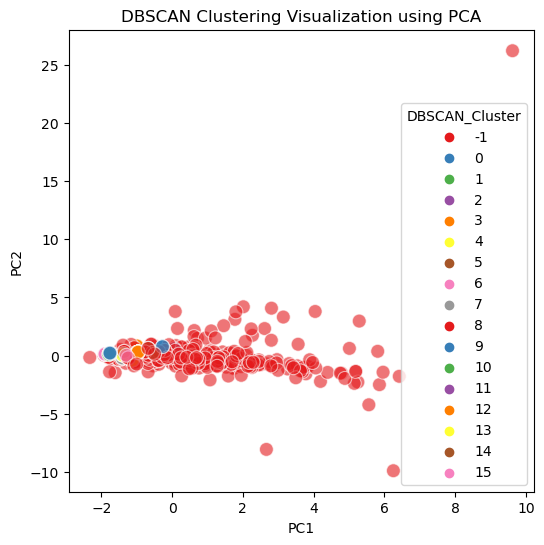

In [21]:
from sklearn.model_selection import GridSearchCV

# Prepare the data for clustering
X = df1[columns_for_clustering]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Parameter grid for GridSearchCV
param_grid = {
    'eps': np.arange(0.5, 2.0, 0.1),
    'min_samples': range(3, 10)
}

# Perform GridSearchCV to find the best parameters based on silhouette score
best_dbscan_score = -1
best_eps = 0
best_min_samples = 0

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        if len(set(dbscan_labels)) > 1:  # To avoid noise-only results
            score = silhouette_score(X_scaled, dbscan_labels)
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_eps = eps
                best_min_samples = min_samples

# Perform DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)
df1['DBSCAN_Cluster'] = dbscan_labels

# Print silhouette score
print(f"DBSCAN Silhouette Score: {best_dbscan_score} (eps={best_eps}, min_samples={best_min_samples})")

# Print the number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Visualize the clustered data using PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='Set1', s=100, alpha=0.6, edgecolor='w')
plt.title('DBSCAN Clustering Visualization using PCA')
plt.show()

# Self-Organising Maps

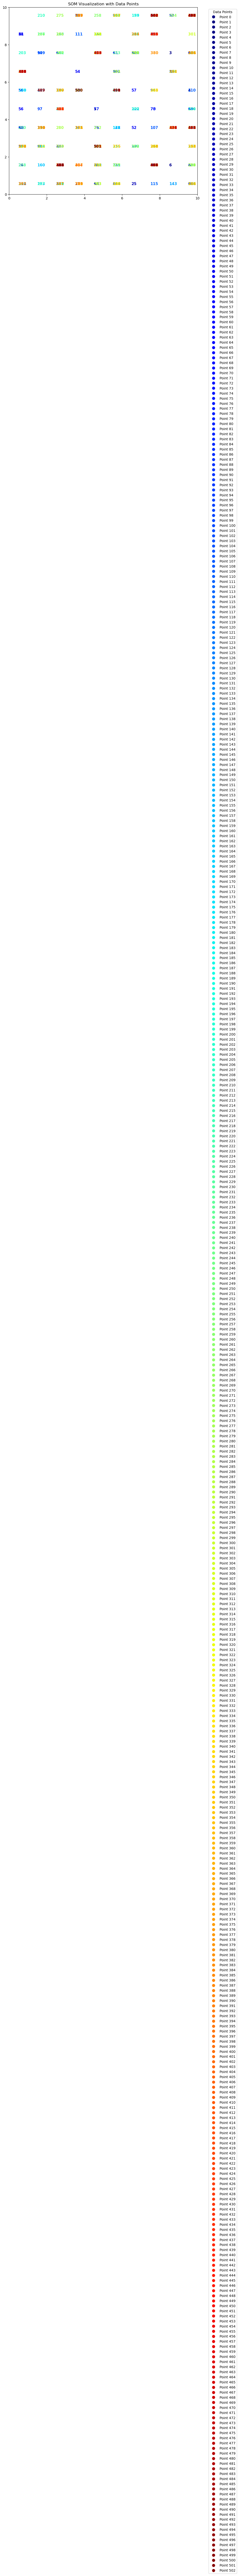

In [23]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler


columns = ['Google', 'Coursera', 'Udemy', 'Moodle', 'Alison', 'Skillshare', "Nico's Weg",
           'Brightspace', 'Blackboard', 'Sakai', 'Zoom', 'Pebble', 'Odin Project',
           'Futurelearn', 'Refinitiv', 'Microsoft Teams', 'Data Camp', 'Odoo', 'USAID',
           'IHRDC', 'LinkedIn Learning', 'Webex', 'Workday', 'SheCodes', 'learnpro',
           'Canvas', 'Pearson', 'Udacity', 'E-Conell University', 'Others', 'Uplearn',
           'Schoology', 'Khan Academy', 'Open University', 'Code Academy', 'Reed Courses',
           'Discord', 'Power School', 'Edstem', 'Visual', 'Auditory', 'Documentation',
           'Kinesthetic', 'Logical', 'Social', 'Solitary', 'Verbal', 'Musical', 'Naturalistic']

data = df1[columns].values

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Define the dimensions of the SOM grid
som_grid_rows = 10
som_grid_columns = 10

# Initialize the SOM
som = MiniSom(som_grid_rows, som_grid_columns, data_normalized.shape[1], sigma=1.0, learning_rate=0.5)

# Randomly initialize the weights
som.random_weights_init(data_normalized)

# Train the SOM
som.train_random(data_normalized, 100)  # Train with 100 iterations


# Create a function to plot the SOM with legend
def plot_som_with_legend(som, data):
    plt.figure(figsize=(10, 10))
    unique_labels = list(range(data.shape[0]))  # Using indices as labels for simplicity
    for i, x in enumerate(data):
        w = som.winner(x)  # Getting the winning node
        plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color=plt.cm.jet(i / len(data)),
                 fontdict={'weight': 'bold', 'size': 11})
    plt.xlim([0, som.get_weights().shape[0]])
    plt.ylim([0, som.get_weights().shape[1]])
    plt.title('SOM Visualization with Data Points')

    # Create a custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Point {i}', 
                          markerfacecolor=plt.cm.jet(i / len(data)), markersize=10) 
               for i in unique_labels]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Data Points')
    
    plt.show()

# Plot the SOM with legend
plot_som_with_legend(som, data_normalized)


# SOM U-Matrix

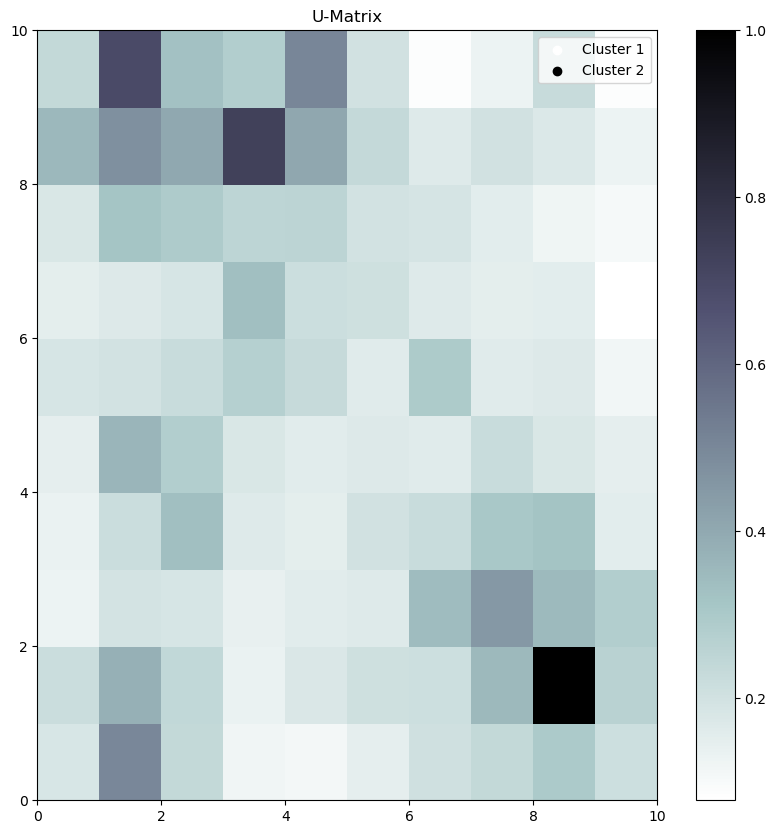

In [24]:
def plot_umatrix(som, data):
    plt.figure(figsize=(10, 10))
    umatrix = som.distance_map().T
    plt.pcolor(umatrix, cmap='bone_r')  # Plot U-Matrix
    plt.colorbar()
    plt.title('U-Matrix')

    # Add a legend
    plt.scatter([], [], c='white', marker='o', label='Cluster 1')
    plt.scatter([], [], c='black', marker='o', label='Cluster 2')
    # Add more clusters if needed

    plt.legend()
    plt.show()

# Call the function to plot the U-Matrix with legend
plot_umatrix(som, data_normalized)

# SOM U-Matrix Optimised

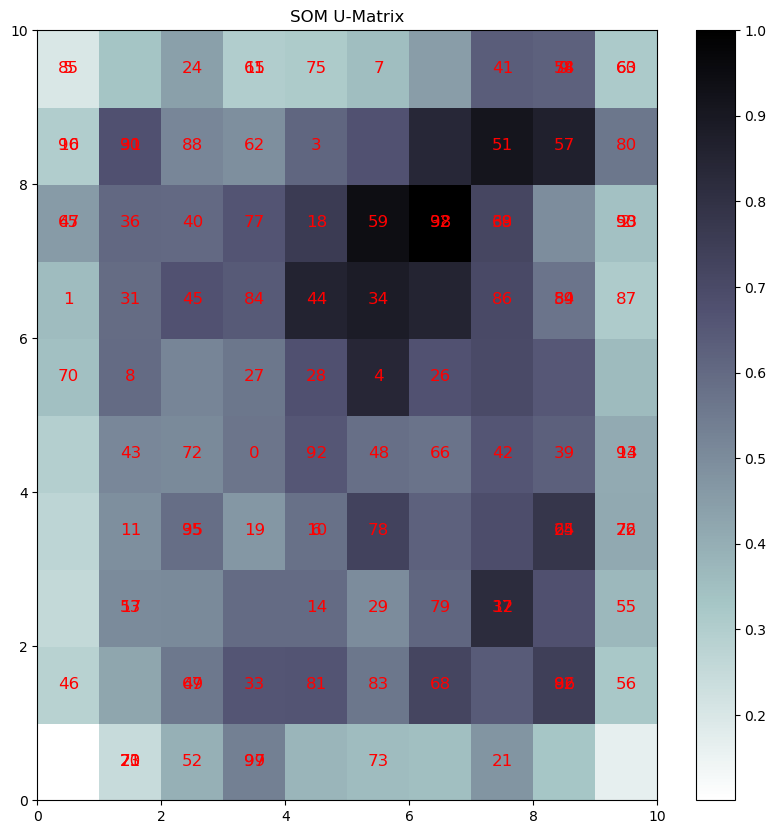

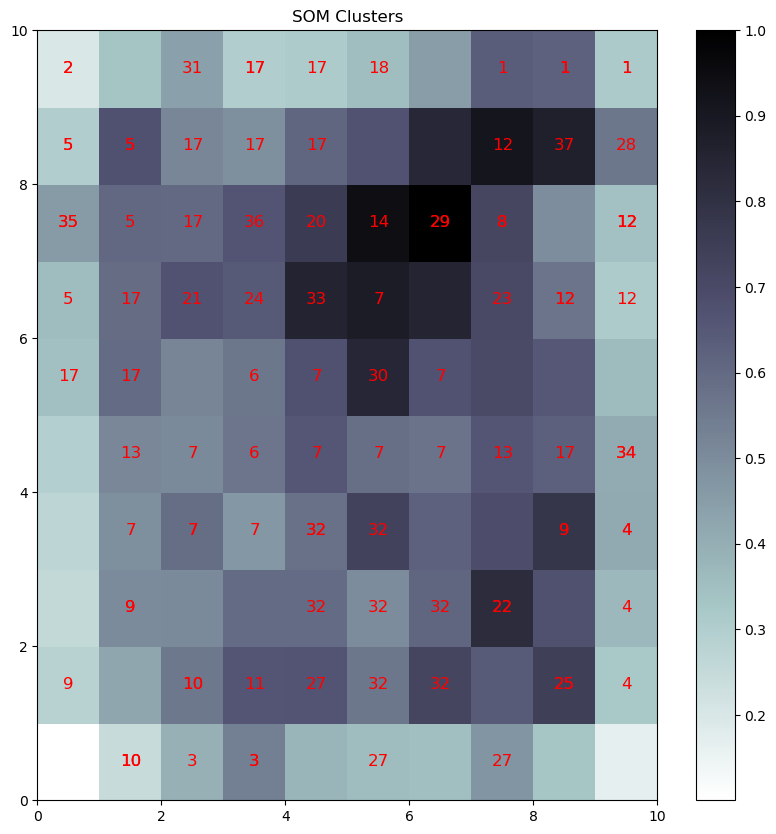

In [25]:
data = np.random.rand(100, 3)  # 100 samples with 3 features

# Function to normalize data
def normalize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Normalize the data
df1 = normalize(df1)

# Parameters for SOM
som_size = (10, 10)  # SOM grid size
input_len = data.shape[1]  # Number of features in the data
sigma = 1.0  # Initial neighborhood value
learning_rate = 0.5  # Initial learning rate
max_iter = 1000  # Maximum number of iterations

# Create the SOM
som = MiniSom(x=som_size[0], y=som_size[1], input_len=input_len, sigma=sigma, learning_rate=learning_rate)

# Initialize the weights
som.random_weights_init(data)

# Train the SOM
som.train_random(data, max_iter)

# Plot the U-Matrix
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map
plt.colorbar()

# Plotting the clusters
for i, x in enumerate(data):
    w = som.winner(x)  # Get the winning node for the sample
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), fontsize=12, ha='center', va='center', color='red')
    
plt.title('SOM U-Matrix')
plt.show()

# Cluster identification
from scipy.cluster.hierarchy import fclusterdata

# Get the weights of the SOM
weights = som.get_weights().reshape(-1, input_len)

# Use hierarchical clustering to identify clusters
clusters = fclusterdata(weights, t=1, criterion='inconsistent')

# Plot clusters
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot the distance map
plt.colorbar()

# Plotting the clusters
for i, x in enumerate(data):
    w = som.winner(x)  # Get the winning node for the sample
    cluster = clusters[w[0] * som_size[1] + w[1]]  # Get the cluster number
    plt.text(w[0] + 0.5, w[1] + 0.5, str(cluster), fontsize=12, ha='center', va='center', color='red')

plt.title('SOM Clusters')
plt.show()
